Many of the ideas in this tutorial are simplified versions of what is discussed in 

```
    Priebe, C. E., Park, Y., Vogelstein, J. T., Conroy, J. M., Lyzinski, V., Tang, M., ... & Bridgeford, E. (2019). On a two-truths phenomenon in spectral graph clustering. Proceedings of the National Academy of Sciences, 116(13), 5995-6000.
```

Create an affinity network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


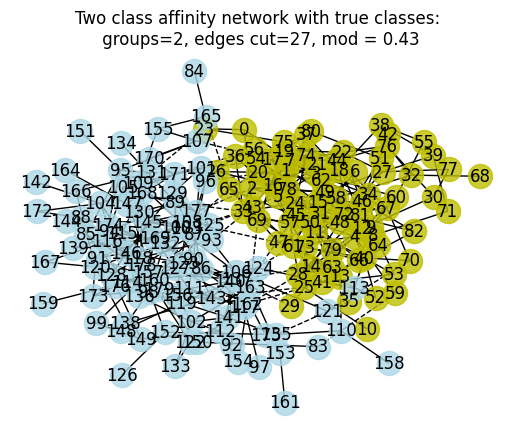

In [ ]:
##############
### Cell 1 ###
##############

## REQUIRES pip install scikit-learn

import numpy as np
from Girvan_Newman_stochastic_block_network_v2 import AssortativeMixing
from drawing_utilities import show_dendrogram
from drawing_utilities import show_partitions
from drawing_utilities import show_kCores
from drawing_utilities import show_kCores_by_partition
from drawing_utilities import show_2D_scatterplot
from partitioning_utilities import get_k_fiedler_eigenvectors_sparse
from partitioning_utilities import get_k_leading_eigenvectors_sparse
from partitioning_utilities import get_colors_from_clusters


%load_ext autoreload

a = 0.4
b = 0.02
c = 0.4
M = np.array([[a,b],[b,c]])
affinity_network = AssortativeMixing(M, num_edges=400)
G = affinity_network.G

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions(G, partition, title="Two class affinity network with true classes:\n")

Look at dendrogram

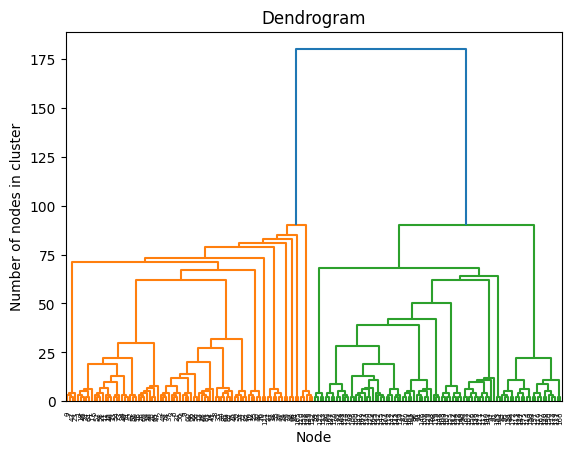

In [181]:
##############
### Cell 2 ###
##############
import networkx as nx
def largest_component(graph):
    # Find all connected components
    components = nx.connected_components(graph)
    
    # Get the largest component
    largest = max(components, key=len)
    
    return graph.subgraph(largest)

H = largest_component(G)
show_dendrogram(H)

Look at kcores

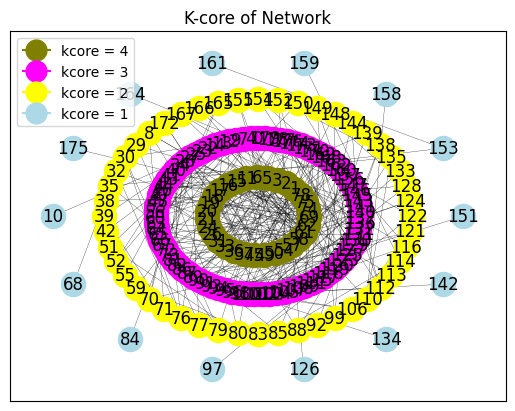

In [182]:
show_kCores(G)

Get first and second fiedler vector

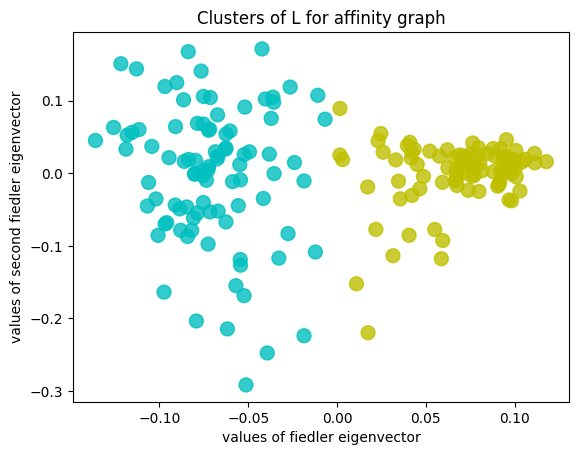

In [183]:
##############
### Cell 3 ###
##############

%autoreload 2

L = nx.linalg.normalized_laplacian_matrix(G)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=2)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for affinity graph")


Show graph partitioned into two clusters using the Laplacian embedding

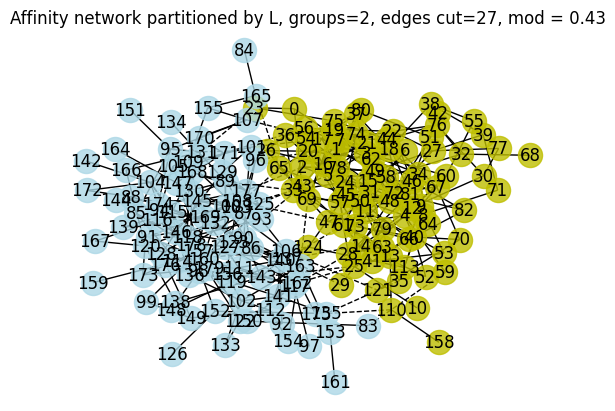

In [184]:
##############
### Cell 4 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by L")

Repeat but partition using adjacency matrix

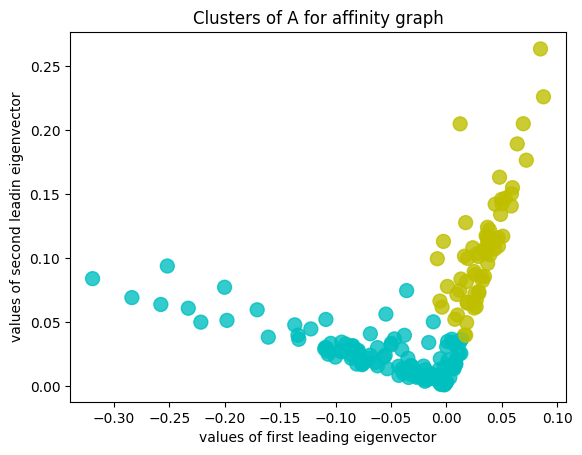

In [185]:
##############
### Cell 5 ###
##############
A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=2)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for affinity graph")


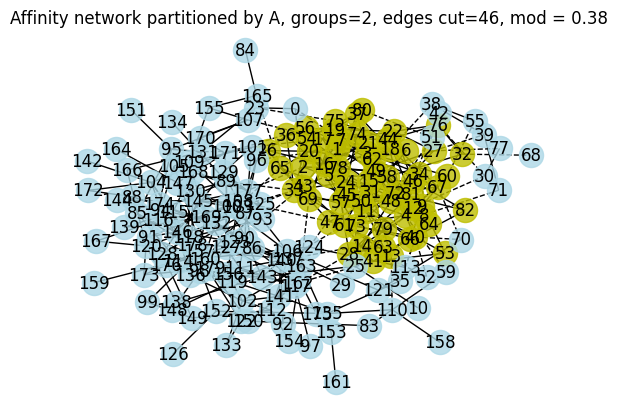

In [186]:
##############
### Cell 6 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by A")

Redraw to see which node classes belong n core and which belong in the periphery

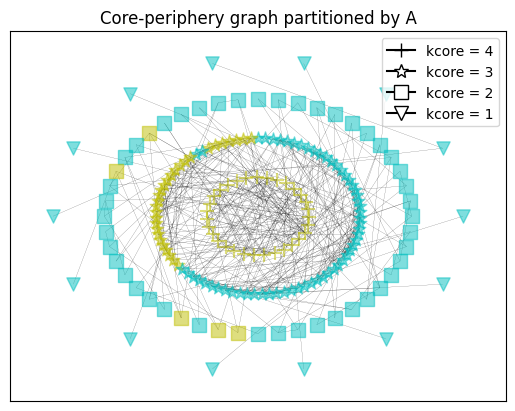

In [187]:
##############
### Cell 7 ###
##############

show_kCores_by_partition(G, colors, title="Core-periphery graph partitioned by A")

---

Create a core-periphery network

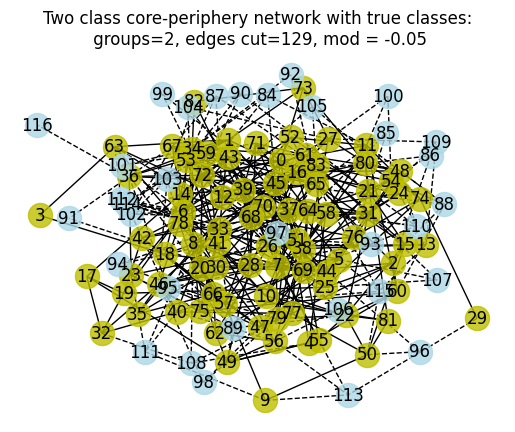

In [188]:
##############
### Cell 8 ###
##############

a = 0.4
b = 0.1
c = 0.001
M = np.array([[a,b],[b,c]])
core_periphery_network = AssortativeMixing(M=M, poisson_lambda=[8,4], num_edges=400)
G = core_periphery_network.G

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions(G, partition, title="Two class core-periphery network with true classes:\n")



Look at dendrogram

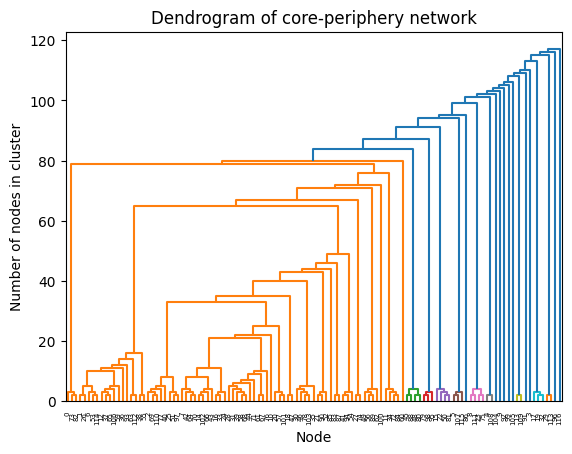

In [189]:
##############
### Cell 9 ###
##############

H = largest_component(G)
show_dendrogram(H,title="Dendrogram of core-periphery network")

Look at kcores

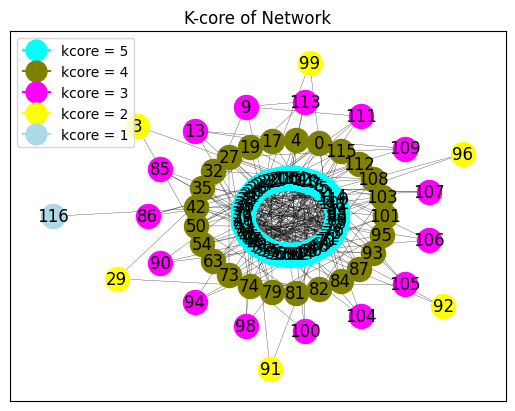

In [190]:
###############
### Cell 10 ###
###############

show_kCores(G)

Let's partition using the normalized Laplacian matrix

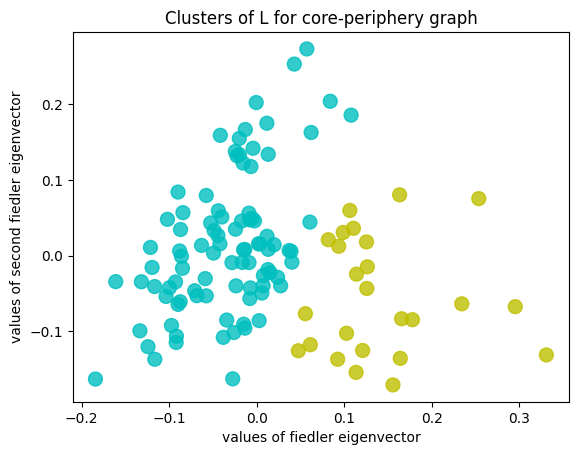

In [191]:
###############
### Cell 11 ###
###############

L = nx.linalg.normalized_laplacian_matrix(G)
fiedler_vectors = get_k_fiedler_eigenvectors_sparse(L, 2)
colors = get_colors_from_clusters(fiedler_vectors, num_clusters=2)
show_2D_scatterplot(fiedler_vectors[:,0],
                    fiedler_vectors[:,1],
                    colors,
                    xlabel = "values of fiedler eigenvector",
                    ylabel = "values of second fiedler eigenvector",
                    title = "Clusters of L for core-periphery graph")

Show partition

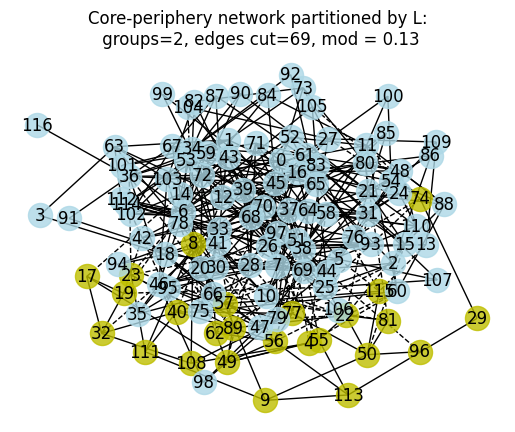

In [192]:
###############
### Cell 12 ###
###############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Core-periphery network partitioned by L:\n")

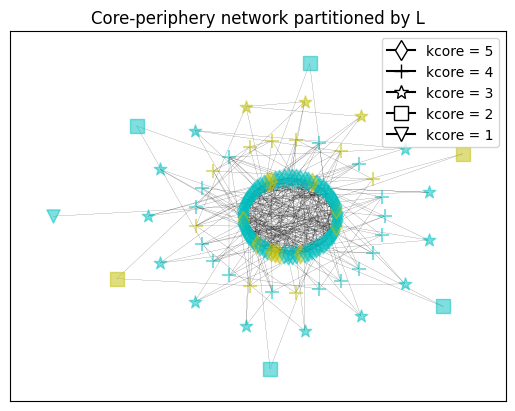

In [193]:
show_kCores_by_partition(G,colors,title = "Core-periphery network partitioned by L")

Repeat using the adjacency matrix

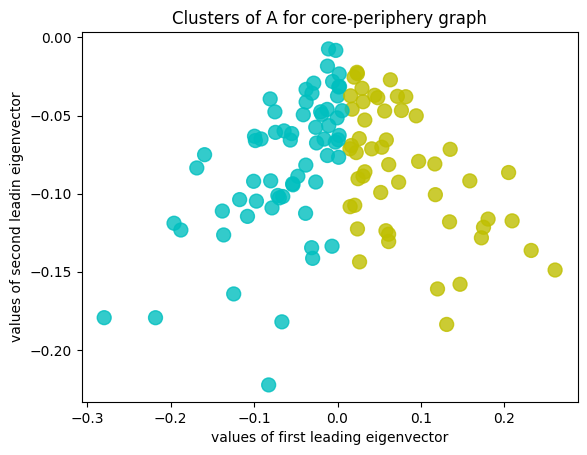

In [194]:
###############
### Cell 13 ##
###############

A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, 2)
colors = get_colors_from_clusters(leading_vectors, num_clusters=2)

show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for core-periphery graph")

Show partition by adjacency matrix

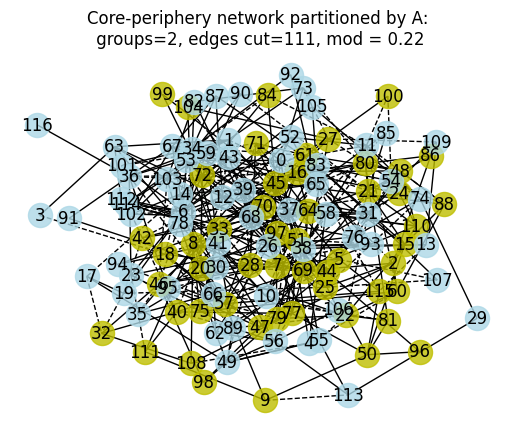

In [195]:
###############
### Cell 14 ###
###############

group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Core-periphery network partitioned by A:\n")

Redraw using the shell layout to see which class falls in core and which in periphery

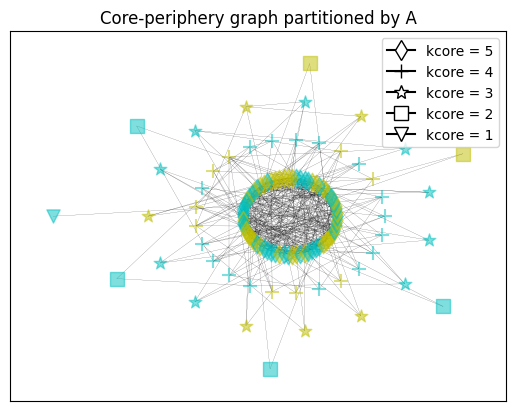

In [196]:
show_kCores_by_partition(G,colors, title="Core-periphery graph partitioned by A")

---

### Clustering Using More Information

In [212]:
from sklearn.manifold import TSNE
num_eigenvectors: int = 5
A = nx.linalg.adjacency_matrix(G)
leading_vectors = get_k_leading_eigenvectors_sparse(A, num_eigenvectors)
tsne: TSNE = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(leading_vectors)
colors = get_colors_from_clusters(tsne_components, num_clusters=3)


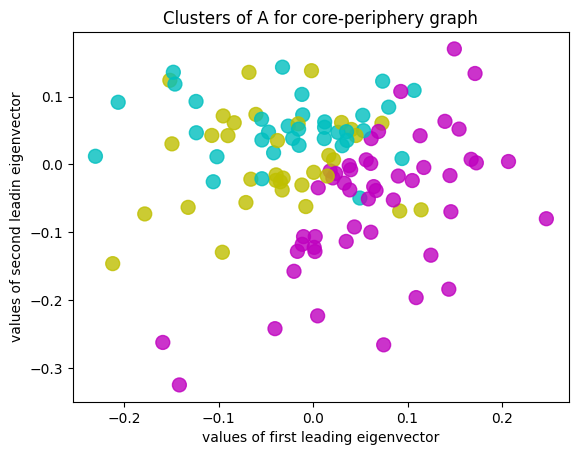

In [213]:
show_2D_scatterplot(leading_vectors[:,0],
                    leading_vectors[:,1],
                    colors,
                    xlabel = "values of first leading eigenvector",
                    ylabel = "values of second leadin eigenvector",
                    title = "Clusters of A for core-periphery graph")

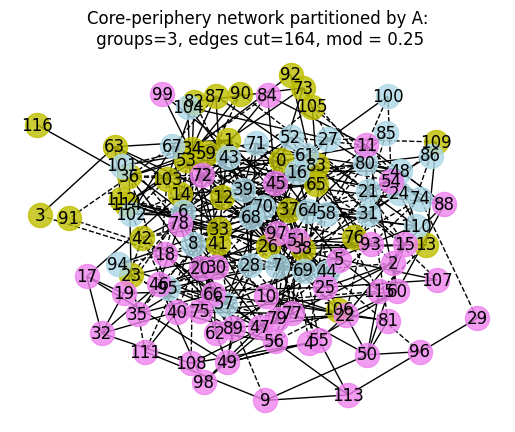

In [214]:
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}
group3 = {node for node in G.nodes() if colors[node] == 'm'}


show_partitions(G, 
                partition=(group1, group2, group3), 
                title="Core-periphery network partitioned by A:\n")

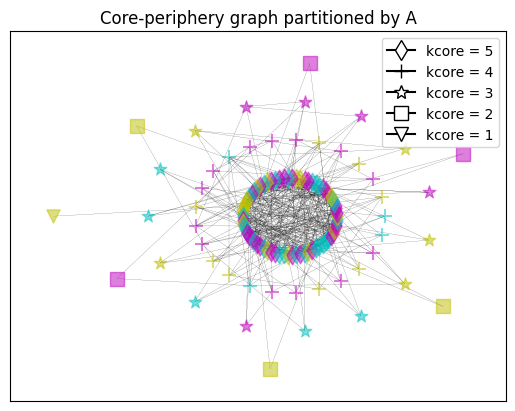

In [215]:
show_kCores_by_partition(G,colors, title="Core-periphery graph partitioned by A")